In [28]:
import os
import pickle
import warnings
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
warnings.filterwarnings('ignore')

In [29]:

df=pd.read_csv('news.csv')
print('Dataset : ',format(df.shape))


Dataset :  (6335, 4)


In [30]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [31]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [32]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [33]:
df.index

RangeIndex(start=0, stop=6335, step=1)

In [34]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [35]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [36]:
df = df.drop(['title'],axis = 1)
df

,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,4490,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [37]:
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [38]:
df.label.unique()

array(['FAKE', 'REAL'], dtype=object)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.33, random_state=8)


In [40]:
x_train

1295    A program implemented by the National Security...
85      With the shake of an Etch-A-Sketch, Mitt Romne...
1473    Authorities Friday released the names of those...
2157    Over the last six years, the Obama administrat...
2285    KATHMANDU, Nepal — Nepali citizens frustrated ...
                              ...                        
2181    Most Latino voters intend to support Democrat ...
2409    As they went on their rampage, the men who kil...
2033    By Fred Reed October 28, 2016 \nOh good. The w...
1364    Much about the 2016 campaign has bewildered pu...
4547    Email \n\nDuring a radio interview, comic lege...
Name: text, Length: 4244, dtype: object

In [41]:
y_train

1295    REAL
85      REAL
1473    REAL
2157    REAL
2285    REAL
        ... 
2181    REAL
2409    REAL
2033    FAKE
1364    REAL
4547    FAKE
Name: label, Length: 4244, dtype: object

In [42]:
x_test


2757    In the wake of the worst terrorist attack in A...
3983    An admitted Al Qaeda agent released this month...
5069    Recent remarks by Donald Trump, the presumptiv...
5781    The first nine months of 2013 have convinced u...
4230    Less than a month from Election Day, Donald Tr...
                              ...                        
3344    X Dear Reader! VDARE.com isn’t just a website....
2034    Memorial Day is a time to remember those who g...
2901    Iraqi Govt Warns Civilians Against Fleeing Mos...
4077    Berkeley Protesters Demanding Segregation Forc...
3210    Islamic State militants have acknowledged for ...
Name: text, Length: 2091, dtype: object

In [43]:
y_test

2757    REAL
3983    REAL
5069    REAL
5781    REAL
4230    REAL
        ... 
3344    FAKE
2034    REAL
2901    FAKE
4077    FAKE
3210    REAL
Name: label, Length: 2091, dtype: object

REAL    3171
FAKE    3164
Name: label, dtype: int64
--------------------------------------------
REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64


<AxesSubplot:xlabel='label', ylabel='count'>

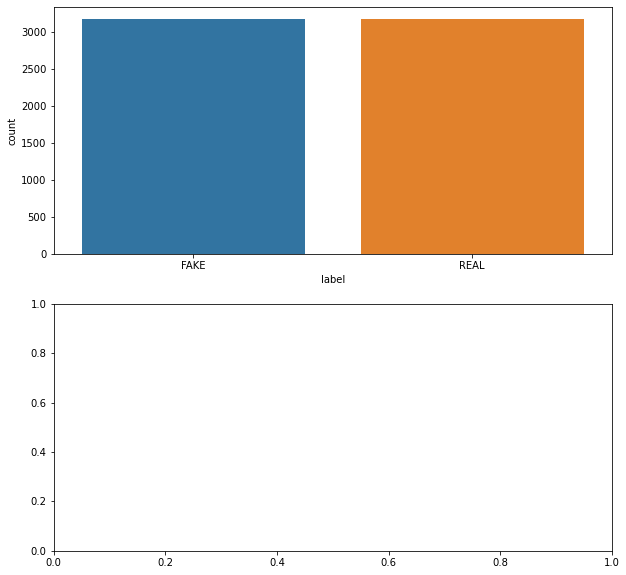

In [44]:
import seaborn as sns
print(df['label'].value_counts())
print("--------------------------------------------")
print(df.label.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.countplot('label',data=df,ax=axes[0])




In [45]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [46]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, stop_words='english')

In [47]:
def show_eval_scores(model, test_set, model_name):
    y_pred = model.predict(df['text'])
    y_true = df['label']
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

In [48]:
countV = CountVectorizer()
train_count = countV.fit_transform(df['text'].values)

In [49]:
countV.vocabulary_

{'daniel': 15786,
 'greenfield': 26358,
 'shillman': 54359,
 'journalism': 32677,
 'fellow': 22787,
 'at': 5737,
 'the': 59827,
 'freedom': 24283,
 'center': 11272,
 'is': 31743,
 'new': 41252,
 'york': 66753,
 'writer': 66320,
 'focusing': 23706,
 'on': 42775,
 'radical': 48539,
 'islam': 31784,
 'in': 30160,
 'final': 23118,
 'stretch': 57578,
 'of': 42528,
 'election': 19996,
 'hillary': 28373,
 'rodham': 51470,
 'clinton': 12544,
 'has': 27517,
 'gone': 25951,
 'to': 60504,
 'war': 64851,
 'with': 65918,
 'fbi': 22627,
 'word': 66122,
 'unprecedented': 62955,
 'been': 7339,
 'thrown': 60180,
 'around': 5267,
 'so': 55750,
 'often': 42600,
 'this': 60056,
 'that': 59817,
 'it': 31871,
 'ought': 43264,
 'be': 7183,
 'retired': 50771,
 'but': 10081,
 'still': 57284,
 'for': 23833,
 'nominee': 41671,
 'major': 36824,
 'political': 46170,
 'party': 44336,
 'go': 25816,
 'exactly': 21566,
 'what': 65408,
 'and': 4296,
 'her': 28096,
 'people': 44849,
 'have': 27631,
 'done': 18685,
 'com

In [50]:

len(countV.get_feature_names())

67659

In [53]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)


y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 93.5%


In [52]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])


array([[974,  59],
       [ 84, 974]], dtype=int64)